# Bubble Plot ( Kabarcık Grafiği)

Scatter plot'un farklı bir varyasyonu olan buble plotta scatter plottan farklı olarak 2 değil 3 boyut vardır. Bu grafik tipinde nokta yerine kabarcıklar vardır. Kabacıkların genişliği bize o değerin toplam içerisindeki ağırlığı konusunda bilgi verir.

Baloncuk grafiği çizmek için grafik türü olarak ***scatter*** seçip ****s*** parametresi ile o noktanın ağırlığını göndeririz.

Örnekte kullandığımız veri setine ulaşmak için: 

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

Bubble chart örneği içn elimizde bulunan göçmen sayılarından Arjantin ile Brazilya arasındaki göçmen sayılarının karşılaştıracağız. Arjantin'deki 2002 ekonomik krizinin göçmen sayısında etkisini değerlendireceğiz.  Bunun için her iki ülkenin göçmen sayısının diğer senelere göre artış oranını 3. boyut olarak kullanacağız.

Öncelikli olarak verimizi bu grafiği çizmek için hazır hale getirelim.

In [4]:
# Öncelikli olarak verimizi yıla göre transpose edeceğiz.Ülkeleri kolon haline getireceğiz.
df_can_t=df_can[years].transpose()
# Index olan yıl bilgisini integer yapacağız.
df_can_t.index=map(int,df_can_t.index)
# Index'e isim verelim ve bu indexi kolon haline getirelim. Bu şekilde verdiğimiz bu isim kolon adı olacaktır.
df_can_t.index.name="Year"
df_can_t.reset_index(inplace=True)
# Yaptığımız değişiklikleri görelim
df_can_t.head(3)


,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102


Ağırlığı scatter plot içinde s parametresi ile gönderbilmek için öncelikli olarak yıllara göre değişimin her yılın toplam içindeki ağırlığını hesaplammamız gerekiyor. Ağırlık hesaplamak için birden fazla yöntem bulunmaktadır. Aşağıda `feature scaling`yöntemi ile normalize etme yöntemini kullancağız. 

In [5]:
# Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Hazırladığımız veri ile grafiği çizdirmeye başlayacağız. Bunun için:
* ax parametresini kullanarak 2 grafiği bir grafik panosu üzerinde üst üste göstereceğiz. 
* s parametresi ile önceden hazırladığımız normalize edilmiş veriyi grafik ekleyeceğiz.
    * Burada ölçek içinde kaybolmasın diye 2000 ile çarpıp, 0 olan değerde kaybolmasın diye 10 ekleyeceğiz. Burada birinin diğerine göre değerini değerlendirdiğimiz için bu değerler sadece görünümün düzgün olmasını sağlayacak.

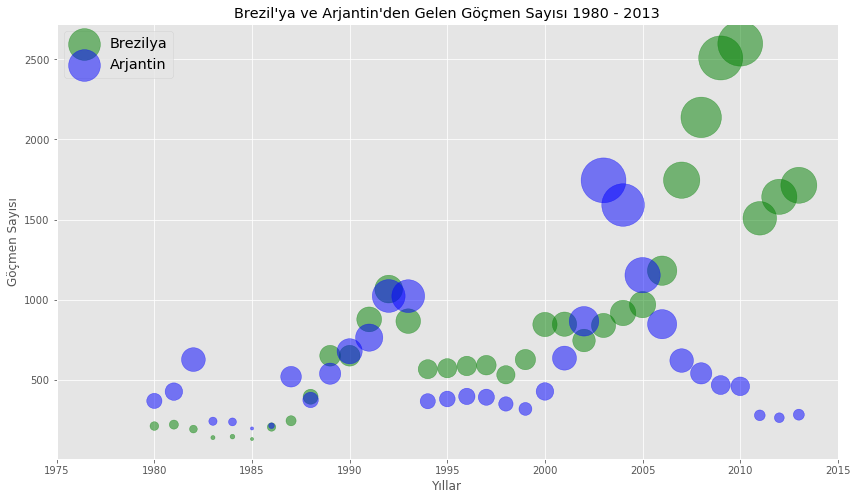

In [6]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='green',
                    s=norm_brazil * 2000 + 10,   
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0 # Burada ax ile aynı pano üzerinde olmasını sağlıyoruz.
                   )

ax0.set_ylabel("Göçmen Sayısı")
ax0.set_xlabel("Yıllar")
ax0.set_title("Brezil'ya ve Arjantin'den Gelen Göçmen Sayısı 1980 - 2013")
ax0.legend(["Brezilya", "Arjantin"], loc='upper left', fontsize='x-large')

plt.show()

Yukarıdaki grafikte Arjantin'in 1992-1993 ve 2002-2003 yıllarında göçmen sayısının önceki yıllara göre artış gösterdiği sonrasında düşmeye başladığını görebiliyoruz. Aynı şekilde Brezilya için 2005 yılından sonra ciddi bir artış başladığını ve önceki yıllara göre 2009 ve 2010 yılında zirveye çıktığını görebilmekteyiz.